In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [2]:
train_file = 'Train.csv'
test_file = 'Test.csv'



In [3]:
df = pd.read_csv(train_file, index_col='ID')



In [4]:
df.head()



,stock,Date,Open,High,Low,Close,holiday,unpredictability_score
ID,,,,,,,,
id_0,0,2017-01-03,82.9961,82.7396,82.9144,82.8101,1,7
id_1,0,2017-01-04,83.1312,83.1669,83.3779,82.9690,0,7
id_2,0,2017-01-05,82.6622,82.7634,82.8984,82.8578,0,7
id_3,0,2017-01-06,83.0279,82.7950,82.8425,82.7385,0,7
id_4,0,2017-01-09,82.3761,82.0828,82.1473,81.8641,0,7


In [5]:
tdf = pd.read_csv(test_file, index_col='ID')
tdf.head()


,stock,Date,holiday,unpredictability_score
ID,,,,
id_713,0,2019-11-01,0,7
id_714,0,2019-11-04,0,7
id_715,0,2019-11-05,0,7
id_716,0,2019-11-06,0,7
id_717,0,2019-11-07,0,7


In [6]:
for col in df.columns:
    print(df[col].isnull().sum())
for col in tdf.columns:
    print(tdf[col].isnull().sum())
    

0
0
0
0
0
0
0
0
0
0
0
0


In [7]:
df.index.nunique(), df.shape



(73439, (73439, 8))

In [8]:
tdf.index.nunique(), tdf.shape


(4223, (4223, 4))

# data analysis


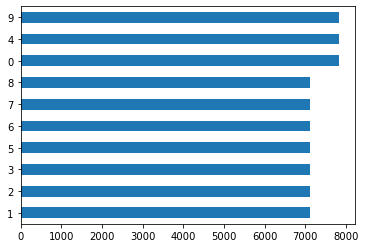

In [9]:
df.unpredictability_score.value_counts(dropna=False, sort=True, ascending=True).sort_values().plot(kind='barh')



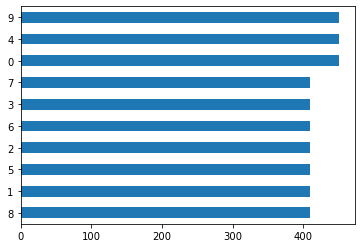

In [10]:
tdf.unpredictability_score.value_counts(dropna=False, sort=True, ascending=True).sort_values().plot(kind='barh')



In [11]:
df.unpredictability_score.value_counts(dropna=False, sort=True, ascending=True, normalize=True)



1    0.097087
2    0.097087
3    0.097087
5    0.097087
6    0.097087
7    0.097087
8    0.097087
0    0.106796
4    0.106796
9    0.106796
Name: unpredictability_score, dtype: float64

In [12]:
tdf.unpredictability_score.value_counts(dropna=False, sort=True, ascending=True, normalize=True)



8    0.097087
1    0.097087
5    0.097087
2    0.097087
6    0.097087
3    0.097087
7    0.097087
0    0.106796
4    0.106796
9    0.106796
Name: unpredictability_score, dtype: float64

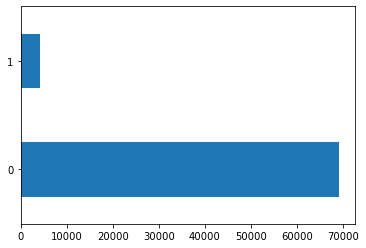

In [13]:
df.holiday.value_counts().plot(kind='barh')



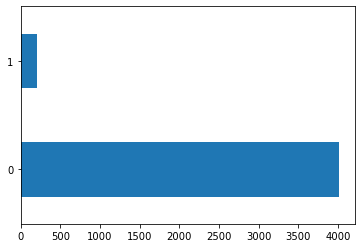

In [14]:
tdf.holiday.value_counts().plot(kind='barh')



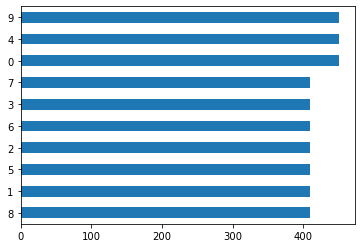

In [15]:
df[df['holiday'] == 1].unpredictability_score.value_counts(dropna=False, sort=True, ascending=True).sort_values().plot(kind='barh')


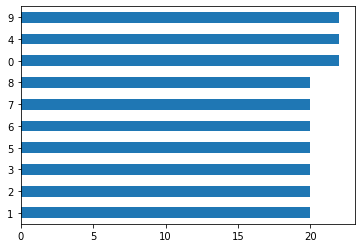

In [16]:
tdf[tdf['holiday'] == 1].unpredictability_score.value_counts(dropna=False, sort=True, ascending=True).sort_values().plot(kind='barh')



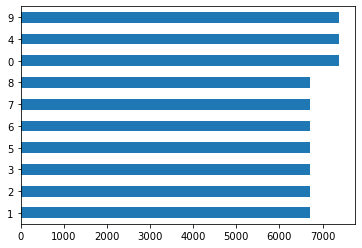

In [17]:
df[df['holiday'] == 0].unpredictability_score.value_counts(dropna=False, sort=True, ascending=True).sort_values().plot(kind='barh')



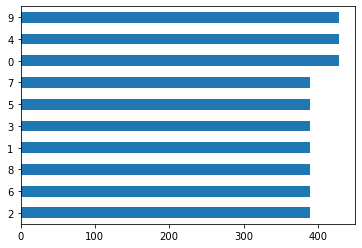

In [18]:
tdf[tdf['holiday'] == 0].unpredictability_score.value_counts(dropna=False, sort=True, ascending=True).sort_values().plot(kind='barh')



In [19]:
df.index.intersection(tdf.index)


Index([], dtype='object', name='ID')

In [20]:
df.stock.value_counts(sort=True, dropna=False)



63     713
82     713
77     713
14     713
78     713
      ... 
99     713
36     713
100    713
37     713
0      713
Name: stock, Length: 103, dtype: int64

In [21]:
tdf.stock.value_counts(sort=True, dropna=False)



99    41
45    41
5     41
9     41
13    41
      ..
78    41
82    41
86    41
90    41
0     41
Name: stock, Length: 103, dtype: int64

In [22]:
pd.Series(list(set(df.stock) & set(tdf.stock))), len(set(tdf.stock))


(0        0
 1        1
 2        2
 3        3
 4        4
       ... 
 98      98
 99      99
 100    100
 101    101
 102    102
 Length: 103, dtype: int64,
 103)

In [23]:
for s in df.stock.unique():
    # assert if unpredictabilty count is same
    assert(len(df[df['stock'] == s].unpredictability_score.value_counts()) == 1)
    assert(len(tdf[tdf['stock'] == s].unpredictability_score.value_counts()) == 1)
    
    # assert if dates are different 
    assert(len(df[df['stock'] == s].Date.value_counts()) == df[df['stock'] == s].Date.shape[0])
    
    assert(len(tdf[tdf['stock'] == s].Date.value_counts()) == tdf[tdf['stock'] == s].Date.shape[0])
    
    # are there any dates common between test and train for a stock
    
    assert(pd.Series(list(set(df[df['stock'] == s].Date) & set(tdf[tdf['stock'] == s].Date))).shape[0] == 0)
    
    

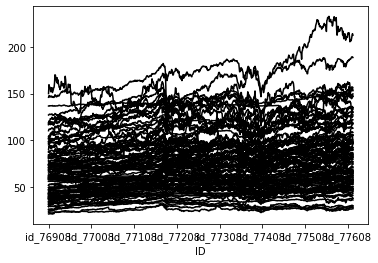

In [24]:
for i in df.stock.unique():
    df[df['stock'] == i]['Close'].plot(style='k')


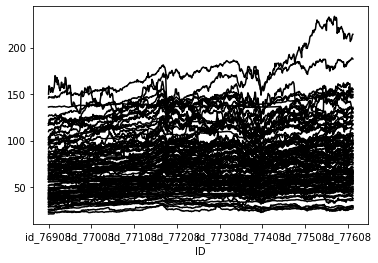

In [25]:
for i in df.stock.unique():
    df[df['stock'] == i]['High'].plot(style='k')


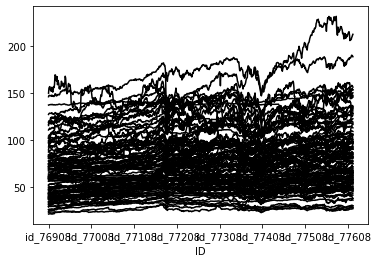

In [26]:
for i in df.stock.unique():
    df[df['stock'] == i]['Low'].plot(style='k')


In [27]:
t_min, t_max, test_min, test_max = '2017-01-03', '2019-10-31',  '2019-11-01',  '2019-12-31'
for i in df.stock.unique():
    assert(df[df['stock'] == i]['Date'].min() == t_min)
    assert(df[df['stock'] == i]['Date'].max() == t_max)
    assert(tdf[tdf['stock'] == i]['Date'].min() == test_min)
    assert(tdf[tdf['stock'] == i]['Date'].max() == test_max)


In [28]:
df.iloc[:, [0, 1, 2, 3, 4, 6, 7]].columns

Index(['stock', 'Date', 'Open', 'High', 'Low', 'holiday',
       'unpredictability_score'],
      dtype='object')

In [29]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]][df['stock'] == 1].reset_index(drop=True, inplace=False)
y = df.iloc[:, [5]][df['stock'] == 1].reset_index(drop=True, inplace=False)
X_train, X_test = train_test_split(X, test_size=.2)

In [30]:
X_train.shape, X_test.shape

((570, 8), (143, 8))

In [31]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features
from tsfresh.feature_extraction import settings, extract_features, MinimalFCParameters, EfficientFCParameters, ComprehensiveFCParameters

In [32]:
X_train

,stock,Date,Open,High,Low,Close,holiday,unpredictability_score
680,1,2019-09-17,45.8787,45.7767,46.1886,45.9863,0,0
22,1,2017-02-03,38.5551,38.3790,38.8260,38.5994,0,0
285,1,2018-02-21,40.5539,40.3689,40.8355,40.5984,0,0
526,1,2019-02-06,42.8803,42.8343,43.1586,42.9094,0,0
15,1,2017-01-25,38.5551,38.3790,38.8260,38.5994,0,0
...,...,...,...,...,...,...,...,...
224,1,2017-11-21,40.3981,40.2138,40.6789,40.4426,0,0
97,1,2017-05-23,39.7024,39.6201,39.9795,39.8462,0,0
549,1,2019-03-12,43.6055,43.4111,43.8770,43.6545,0,0
166,1,2017-08-30,40.2638,40.0800,40.5438,40.3082,0,0


In [33]:
# X_train = extract_features(X_train, default_fc_parameters=EfficientFCParameters(), 
#                           n_jobs=0, disable_progressbar=False, chunksize=None, column_id='stock', column_sort='Date')

In [34]:
from tsfresh.utilities.dataframe_functions import roll_time_series

In [35]:
X_train_rolled = roll_time_series(X_train, column_id='stock', column_sort='Date')

Rolling: 100%|██████████| 20/20 [00:00<00:00, 20.16it/s]


In [36]:
X_train_rolled

,stock,Date,Open,High,Low,Close,holiday,unpredictability_score,id
0,1,2017-01-03,38.4097,38.2343,38.6799,38.4540,1,0,"(1, 2017-01-03)"
1,1,2017-01-03,38.4097,38.2343,38.6799,38.4540,1,0,"(1, 2017-01-04)"
2,1,2017-01-04,38.5551,38.3790,38.8260,38.5994,0,0,"(1, 2017-01-04)"
3,1,2017-01-03,38.4097,38.2343,38.6799,38.4540,1,0,"(1, 2017-01-06)"
4,1,2017-01-04,38.5551,38.3790,38.8260,38.5994,0,0,"(1, 2017-01-06)"
...,...,...,...,...,...,...,...,...,...
147157,1,2019-10-18,45.6370,45.4827,45.8782,45.6595,0,0,"(1, 2019-10-31)"
147158,1,2019-10-22,45.6908,45.5543,45.9725,45.7447,0,0,"(1, 2019-10-31)"
147159,1,2019-10-25,45.8535,45.6797,46.1308,45.9002,0,0,"(1, 2019-10-31)"
147160,1,2019-10-28,45.8976,45.7155,46.1353,45.9425,0,0,"(1, 2019-10-31)"


In [37]:
# X_train_features = extract_features(X_train_rolled, default_fc_parameters=EfficientFCParameters(), 
#                                     n_jobs=7, disable_progressbar=False, chunksize=None, column_id='stock', column_sort='Date')